# Data Analysis - Celebrity Deaths in 2016

Source: [Wikipedia - Deaths in 2016](https://en.wikipedia.org/wiki/Deaths_in_2016)

#### Structure of dataset:
- File: "celebrity_deaths_2016.xlsx"
- Contains 2 sheets:
 - "celeb_death": contains records of deaths of famous humans and non-humans
 - "cause_of_death": contains the causes of the deaths (you'll need to merge it with the "celeb_death" sheet)

#### Other information about the dataset:
- The cause of death was not reported for all individuals
- The dataset might include deaths that took place in other years (you'll need to ignore these records)
- The dataset might contain duplicate records (you'll need to remove them)

#### The goals of the exercise:
- Load, merge, and clean the data
- Explore the data and answer some simple questions
- Run some basic analysis
- Visualize your results

In [1]:
"""
We're providing most of the import statements you need for the entire exercise
"""


# CIT 5900 HW 6
# LIN Zhongyang 88653480

import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

### Load, merge, and clean the data

In [2]:
""" 1.
1. Load the "celebrity_deaths_2016.xlsx" data file in the name "xl". (This file is saved in the same directory as this notebook.)
2. Print the sheet names

Hint:
Look at the xl.sheet_names property
"""
xl = pd.ExcelFile('celebrity_deaths_2016.xlsx')
print(xl.sheet_names)



['celeb_death', 'cause_id_all', 'cause_of_death']


In [3]:
""" 2.
1. Read the "celeb_death" sheet into a dataframe named "df"
2. Take a look at the top 5 rows
"""

# your code here

df = xl.parse('celeb_death')
df.head()

C:\Users\cathy\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date of death,name,age,bio,cause_id
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0


In [4]:
""" 3.
1. Take a look at the data types stored in each column in df
2. Get the shape of df
"""

# your code here

print(df.dtypes)
df.shape


date of death    datetime64[ns]
name                     object
age                      object
bio                      object
cause_id                float64
dtype: object


(6594, 5)

In [5]:
""" 4.
Drop the duplicates (based on all columns) from df
"""

# your code here
df = df.drop_duplicates()




In [6]:
""" 5.
1. Read the "cause_of_death" sheet into a DataFrame named "cause_of_death"
2. Take a look at the top 5 rows
"""

# your code here
cause_of_death = xl.parse('cause_of_death')
cause_of_death.head()

C:\Users\cathy\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,cause_id,cause of death
0,753,ALS
1,1039,bomb
2,1120,shot
3,1499,fall
4,1629,shot


In [7]:
""" 6.
Drop the duplicates (based on the "cause_id" column) from the cause_of_death DataFrame

Hint: There is a single DataFrame method that does this
Use the "subset" argument to specify the "cause_id" column

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
"""

# your code here
cause_of_death = cause_of_death.drop_duplicates('cause_id')


In [8]:
""" 7.
1. Merge the cause_of_death DataFrame with the df DataFrame and name the new DataFrame as "df"
2. Take a look at the top 5 rows in df

Note: There are records in df (left DataFrame) that do not have a matching record in cause_of_death (right DataFrame)
We want to see ALL records in df despite the missing matches in cause_of_death, so you DON'T want to use an "inner join"
"""

# your code here

df = pd.merge(left=df, right=cause_of_death, how='left', left_on='cause_id', right_on='cause_id')
df.head(7000)

,date of death,name,age,bio,cause_id,cause of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure
...,...,...,...,...,...,...
6569,2015-05-14,BB King,89,Singer,10648.0,heart failure
6570,2015-06-07,Christopher Lee,93,Actor,10648.0,heart failure
6571,2015-07-31,Roddy Piper,61,Pro Wrestler,9047.0,heart attack
6572,2015-09-22,Yogi Berra,90,Baseball Player,12202.0,natural causes


### Querying data

For the following questions, all the operations are on the Dataframe df.

In [9]:
""" 8.
We'll be doing some calculations with the age column, but it was loaded from the data file as dtype "object"
So first, we need to cast DataFrame df to a numeric value
"""

# your code here

all_age = df['age']
pd.to_numeric(all_age,errors='coerce')
df['age'] = pd.to_numeric(all_age,errors='coerce')
df['age']



0       71.0
1       74.0
2       79.0
3       45.0
4       83.0
        ... 
6569    89.0
6570    93.0
6571    61.0
6572    90.0
6573    73.0
Name: age, Length: 6574, dtype: float64

In [26]:
""" 9.
What was the average age of death? Store this value in a variable called 'avg_age', then print it.
"""

# your code here

avg_age = df['age'].mean()
print(avg_age)






77.03194103194103


In [27]:
""" 10.
How many people died after the age of 70?
-- Store the result count in a variable named "count" and print it
"""

# your code here
count = 0
for i in df['age']:
    if i > 70:
        count += 1
print(count)

4752


In [28]:
""" 11.
Who died the youngest and what was the cause of death?
-- Store the name in a variable named "youngest_name" and print it
-- Store the cause in a variable named "youngest_cause" and print it

Hint: Get the min age and find the record that has that value
"""

# your code here

youngest_index = df['age'].idxmin()
youngest_name = df['name'][youngest_index]
youngest_cause = df['cause of death'][youngest_index]
print('youngest name is ' + youngest_name)
print('youngest cause is' + youngest_cause)





youngest name is Vautour
youngest cause is euthanised


In [29]:
""" 12.
We'll be running some queries based on the "bio" column, 
but it was loaded from the data file as an object.  So first, cast this column to a string.
"""

# your code here
df = df.astype({'bio':'string'})
df['bio'].head()


0                American art director (Rolling Stone)
1                   American conductor and businessman
2    Australian company director, managing director...
3    Costa Rican swimmer, silver and bronze medalis...
4                     Russian Avar poet and journalist
Name: bio, dtype: string

In [30]:
""" 13.
How many American celebrities died?
-- Store the result count in a variable named "count_american" and print it

Hint: Search the bio for "American"
"""

# your code here

dfamerican = df["bio"].str.contains("American")
df_amer = df[dfamerican]

count_american = len(df_amer)
print("There are "+ str(count_american) +" American celebrities died")




There are 2136 American celebrities died


In [31]:
""" 14.
What was one known cause of death for celebrities who died at age 50?
-- Name the result as "rand_cause"
-- Print the result using "print("Age 50. Cause of Death:", rand_cause)"

Hint: 
Get all the celebrity death records for celebrities who died at 50  
Ignore the ones where the cause of death is unknown, or NaN
import random and randomly select one of the death records 
Extract the cause of death and store in a variable "rand_cause"
"""

#############################################################################################
### DO NOT MODIFY THIS! WE NEED TO SEED THE RANDOM VALUE TO ACCURATELY TEST YOUR SOLUTION ###
import random
random.seed(0)
#############################################################################################

# your code here
die50 = df['age']==50
df_die50 = df[die50]
df_die50.head(100)


,date of death,name,age,bio,cause_id,cause of death,month of death,year of death,nationality of each celebrity
544,2016-01-25,Kalpana,50.0,Indian actress (Thanichalla Njan),9047.0,heart attack,1,2016,Indian
816,2016-02-09,J. B. Danquah-Adu,50.0,Ghanaian politician and MP,3583.0,stabbed,2,2016,Ghanaian
837,2016-02-10,Christopher Rush,50.0,American illustrator (Magic: The Gathering).,NaN,NaN,2,2016,American
895,2016-02-13,Trifon Ivanov,50.0,Bulgarian footballer (national team),9047.0,heart attack,2,2016,Bulgarian
929,2016-02-15,Steve Thompson,50.0,American football player.,NaN,NaN,2,2016,American
1477,2016-03-12,Erik Duval,50.0,Belgian computer scientist.,NaN,NaN,3,2016,Belgian
1492,2016-03-13,Darryl Hunt,50.0,American justice reform activist,40393.0,apparent suicide by gunshot,3,2016,American
1629,2016-03-20,Parveen Sultana Diti,50.0,Bangladeshi actress,2860.0,cancer,3,2016,Bangladeshi
2140,2016-04-16,Ilias Polatidis,50.0,Greek politician.,NaN,NaN,4,2016,Greek
2831,2016-05-25,Cassandra Butts,50.0,American lawyer.,10636.0,acute leukemia,5,2016,American


In [32]:
""" 15.
What was the mean age for each cause of death?

Hint: import numpy and group by 'cause of death', then get the mean age and store the 
resulting DataFrame in a variable named 'df_grouped_cause', then print it
"""
# your code here
import numpy

df_group_cause = df.groupby('cause of death').agg({'age': ['mean']})

df_group_cause







,age
,mean
cause of death,
Alzheimer's disease,79.590909
Myself and I),76.000000
Parkinson's disease,80.200000
Parkinson's disease and multiple myeloma,69.000000
Pick's disease,68.000000
...,...
plane crash,55.500000
progressive supranuclear palsy,84.000000


### Count the number of people who died in each month of 2016
1. Create new columns that shows which month and year each person died in
2. Group all the entries based on the month they appeared in

In [33]:
""" 16.
Make a new column in the DataFrame df with the numeric month of death

Hint:
Use the apply() method to run a function against the "date of death" column,
and return the numeric month (get the value by using ".month")
"""

def get_month(date):
    # your code here
    

    return date.dt.month

month = get_month(df['date of death'])

df['month of death'] = month
df
    

,date of death,name,age,bio,cause_id,cause of death,month of death,year of death,nationality of each celebrity
0,2016-01-01,Tony Lane,71.0,American art director (Rolling Stone),8915.0,brain cancer,1,2016,American
1,2016-01-01,Gilbert Kaplan,74.0,American conductor and businessman,2860.0,cancer,1,2016,American
2,2016-01-01,Brian Johns,79.0,"Australian company director, managing director...",2860.0,cancer,1,2016,Australian
3,2016-01-01,Natasha Aguilar,45.0,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016,Costa
4,2016-01-01,Fazu Aliyeva,83.0,Russian Avar poet and journalist,10648.0,heart failure,1,2016,Russian Avar poet
...,...,...,...,...,...,...,...,...,...
6569,2015-05-14,BB King,89.0,Singer,10648.0,heart failure,5,2015,Singer
6570,2015-06-07,Christopher Lee,93.0,Actor,10648.0,heart failure,6,2015,Actor
6571,2015-07-31,Roddy Piper,61.0,Pro Wrestler,9047.0,heart attack,7,2015,Pro
6572,2015-09-22,Yogi Berra,90.0,Baseball Player,12202.0,natural causes,9,2015,Baseball


In [34]:
""" 17.
Make a new column in the DataFrame df with the year of death

Hint: Apply a function to get the year from the "date of death" column
"""

def get_year(date):
    # your code here
    return date.dt.year

df['year of death'] = get_year(df['date of death'])
df
    

,date of death,name,age,bio,cause_id,cause of death,month of death,year of death,nationality of each celebrity
0,2016-01-01,Tony Lane,71.0,American art director (Rolling Stone),8915.0,brain cancer,1,2016,American
1,2016-01-01,Gilbert Kaplan,74.0,American conductor and businessman,2860.0,cancer,1,2016,American
2,2016-01-01,Brian Johns,79.0,"Australian company director, managing director...",2860.0,cancer,1,2016,Australian
3,2016-01-01,Natasha Aguilar,45.0,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016,Costa
4,2016-01-01,Fazu Aliyeva,83.0,Russian Avar poet and journalist,10648.0,heart failure,1,2016,Russian Avar poet
...,...,...,...,...,...,...,...,...,...
6569,2015-05-14,BB King,89.0,Singer,10648.0,heart failure,5,2015,Singer
6570,2015-06-07,Christopher Lee,93.0,Actor,10648.0,heart failure,6,2015,Actor
6571,2015-07-31,Roddy Piper,61.0,Pro Wrestler,9047.0,heart attack,7,2015,Pro
6572,2015-09-22,Yogi Berra,90.0,Baseball Player,12202.0,natural causes,9,2015,Baseball


In [35]:
""" 18.
There could be a small number of deaths that didn't take place in 2016.  Just in case, 
filter out the deaths that didn't take place in 2016.
-- Name the new DataFrame as "df_2016"
"""

# your code here
diein2016 = df['year of death'] == 2016
df_2016 = df[diein2016]
print(df_2016)

     date of death                    name   age  \
0       2016-01-01               Tony Lane  71.0   
1       2016-01-01          Gilbert Kaplan  74.0   
2       2016-01-01             Brian Johns  79.0   
3       2016-01-01         Natasha Aguilar  45.0   
4       2016-01-01            Fazu Aliyeva  83.0   
...            ...                     ...   ...   
6559    2016-12-31          Peter Fernando  77.0   
6560    2016-12-31    Manjurul Islam Liton  48.0   
6561    2016-12-31           David Meltzer  79.0   
6562    2016-12-31  Prince Dimitri Romanov  90.0   
6563    2016-12-31          Robert Taussat  96.0   

                                                    bio  cause_id  \
0                 American art director (Rolling Stone)    8915.0   
1                    American conductor and businessman    2860.0   
2     Australian company director, managing director...    2860.0   
3     Costa Rican swimmer, silver and bronze medalis...   33897.0   
4                      Russian

In [36]:
""" 19.
Using a pivot table, obtain a list that contains the number of people that died in each month
-- Use the new DataFrame "df_2016"
-- Name the result as "df_per_month"
"""

# your code here

df_number_per_month = pd.pivot_table(df_2016, index = ['month of death'],values = ['year of death'],
                                     aggfunc = ['count'])
print(df_number_per_month)
df_per_month = df_number_per_month['count']['year of death'].values.tolist()



                       count
               year of death
month of death              
1                        669
2                        556
3                        636
4                        540
5                        536
6                        530
7                        543
8                        517
9                        497
10                       511
11                       507
12                       522


### Data Visualization

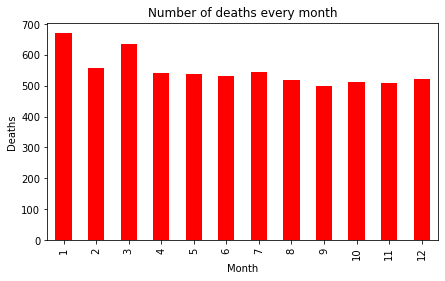

In [37]:
""" 20. 
Visualize the number of deaths per month as a bar chart

Hint: A DataFrame has a simple .plot() method you can use.  

The x axis should show the individual number of the month and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axes
"""

# your code here
figure = df['month of death'].value_counts().sort_index().plot(kind='bar',figsize=(7,4),title='Number of deaths every month',color = 'red')
figure.set_xlabel('Month')
figure.set_ylabel('Deaths')


###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

### Make a bar chart that plots the number of deaths per nationality
1. Create a new column that identifies the nationality of each celebrity, extracting the first word from the bio
2. Make a bar chart that plots the number of deaths per nationality

In [38]:
""" 21.
Create a new column in the DataFrame df that identifies the nationality of each celebrity, 
extracting the first word from the bio

Hint:
To get the nationality from the bio, use the method split() on the column "bio" 
and use the first element in the split result as the nationality.

For simplicity purposes, don't worry about nationalities containing more than 1 word.  For example, 
when getting the nationality from "bio", it's OK to get "New" for New Zealand or "Costa" for Costa Rican.
"""

def get_nationality(bio):
    # your code here
    first_word = bio['bio'].str.split(' ',expand=True)
    bio['nationality of each celebrity'] = first_word[0]
    return bio['nationality of each celebrity']
nationality_all = get_nationality(df)
nationality_all.head(6570)
    

0                American
1                American
2              Australian
3                   Costa
4       Russian Avar poet
              ...        
6565                Actor
6566                Actor
6567                Actor
6568                Actor
6569               Singer
Name: nationality of each celebrity, Length: 6570, dtype: string

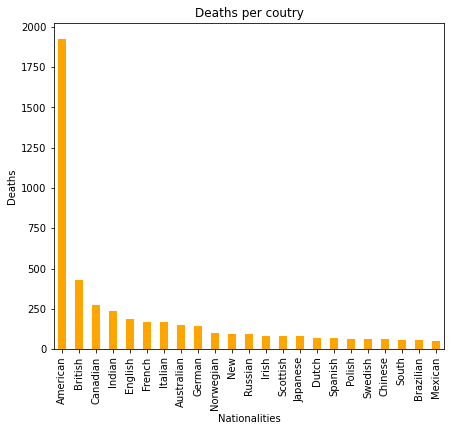

In [39]:
""" 22.
Make a bar chart that plots the number of deaths per nationality
Only include nationalities with more than 50 deaths
-- Name the resulting Series as "unlucky_countries"
Hint(s):
Get the count of unique values in the 'nationality' column using the value_counts() method.
Filter the resulting Series to only include those nationalities with a count of more than 50.
Plot the final Series.  Note, a Series has a simple .plot() method you can use.
The x axis should show the individual nationalities and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axis
"""

# your code here

count_of_unique_values = pd.value_counts(df['nationality of each celebrity'].values, sort=True)
unlucky_countries = count_of_unique_values.loc[lambda x: x >50]
figure = unlucky_countries.plot(kind='bar',figsize=(7,6),title='Deaths per coutry',color= 'orange')
figure.set_xlabel('Nationalities')
figure.set_ylabel('Deaths')



###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################